<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Natural Language Processing: Classification
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 4: Topic 38</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.pardir)
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import numpy as np
import pandas as pd

# importing text preprocessing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


In [3]:
# integrating our preprocessing into a pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

Build a very simple stateless transformer:
- Cleans/preprocesses text

In [4]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        #define attributes to store if text preprocessing requires fitting from data
        pass
    
    def fit(self, data, y = 0):
        # this is where you would fit things like corpus specific stopwords
        # fit probable bigrams with bigram model in here
        
        # save as parameters of Text preprocessor
        
        return self
    
    def transform(self, data, y = 0):
        fully_normalized_corpus = data.apply(self.process_doc)
        
        return fully_normalized_corpus
        
    
    def process_doc(self, doc):

        #initialize lemmatizer
        wnl = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        
        # helper function to change nltk's part of speech tagging to a wordnet format.
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:         
                return None


        # remove stop words and punctuations, then lower case
        doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

        #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize

        # creates list of tuples with tokens and POS tags in wordnet format
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
        doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]

        return " ".join(doc_norm)

In [5]:
data = pd.read_csv('Data/satire_nosatire.csv')
X = data['body']
y = data['target']

In [6]:
proc = TextPreprocessor()
proc.fit_transform(X)

0      note resignation james mattis secretary defens...
1      desperate unwind month nonstop work investigat...
2      nearly halfway presidential term donald trump ...
3      attempt make amends gross abuse power time int...
4      decry senate resolution blame crown prince bru...
                             ...                        
995    britain opposition leader jeremy corbyn push a...
996    turkey take fight islamic state militant syria...
997    malaysia seek reparation goldman sachs group i...
998    israeli court sentence palestinian year impris...
999    least people die due landslide flood trigger t...
Name: body, Length: 1000, dtype: object

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [8]:
prc_steps = [('token_norm', TextPreprocessor()), ('countvec', CountVectorizer(min_df = 0.05, max_df = 0.95))]
preprocess_pipeline = Pipeline(prc_steps)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [10]:
X_tr_proc = preprocess_pipeline.fit_transform(X_train)

In [11]:
X_tr_proc

<700x610 sparse matrix of type '<class 'numpy.int64'>'
	with 45945 stored elements in Compressed Sparse Row format>

In [12]:
feat_names = preprocess_pipeline[
    'countvec'].get_feature_names()

pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)

,able,access,accord,account,accuse,act,action,actually,add,additional,...,woman,word,work,worker,world,write,year,yes,yet,young
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,2,0,0,2,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Building a document classifier model

**Naive Bayes with Multinomial Distribution Likelihood**

- Can be effective for modeling document-term frequency matrix to target class relationships

Bayes theorem:

$$ P(c|\textbf{x}) = \frac{P(\textbf{x}|c)P(c)}{P(\textbf{x})} $$

- Likelihood; $P(\textbf{x}|c)$
- Prior: $P(c)$
- Posterior: $P(c|\textbf{x}) $

Bayes classifier:
    
$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\max} P(\textbf{x}|c)P(c)$$

#### Prior
- simply the target fraction

In [13]:
class_priors = y_train.value_counts()/y_train.shape[0]
class_priors

0    0.502857
1    0.497143
Name: target, dtype: float64

#### The likelihood function

**First step: word count distribution**:

- Multinomial distribution (generalization of 
binomial distribution)

For document with $m$ tokens:
- dictionary of corpus has $d$ unique tokens.
- $\textbf{x} = (x_1,...., x_d)$ vector of token counts for document.



An analogy: $d = 6$ M&M colors

Picking $ m $ M&Ms.

<img src = "Images/picking_candy.jpg" >
    
Follow multinomial distribution.


<a href = "https://www.mashed.com/679227/the-rarest-mm-color-may-surprise-you/#:~:text=Brown%20is%20currently%20the%20rarest%20color%20of%20M%26M's&text=As%20such%2C%20they%20used%20their,their%20findings%20were%20quite%20surprising."> Some interesting facts about M&Ms. </a>

$$ P(\textbf{x}|\theta) = \frac{m!}{x_1!x_2!...x_d!} \theta_{1}^{x_1}\theta_{2}^{x_2}...\theta_{d}^{x_d} $$
Parameters of distribution:
- $\theta_i$: probability of picking $i^{th}$ token  in dictionary from bag of words

**To be estimated from the data**

Words draws/order are **independent** of each other: the **naive** assumption.

<img src = "Images/scrabble.webp" />

#### Second Step: class conditional word count

$$ P(\textbf{x}|c) = \frac{m!}{x_1!x_2!...x_d!} [\theta_c]_{1}^{x_1}[\theta_c]_{2}^{x_2}...[\theta_c]_{d}^{x_d} $$
- $[\theta_c]$ is **class-dependent** set of probability parameters.

Need to fit probability parameters from data.

**Fitting probability parameters for each class**

- Very straightforward.
- Probability of drawing token $i$ if document class $c$

$$ [\hat{\theta}_c]_i = \frac{N_{ci}}{N_c}$$

- Count token $i$ occurence across all documents of class $c$
- Divide by total token count for all documents of class $c$

#### Getting the fit parameters with code

In [14]:
bow_mat = pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)
bow_mat['target'] = y_train
bow_mat

,able,access,accord,account,accuse,act,action,actually,add,additional,...,woman,word,work,worker,world,write,year,yes,yet,young
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,2,0,0,2,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
class1_bow_mat = bow_mat[bow_mat['target'] == 1].drop(columns = ['target'])

# class 1 token probabilities:
N_tok_1 = class1_bow_mat.sum(axis = 0) 
N_1 =  class1_bow_mat.values.sum()

# get probabilities for each token: class 1
proba_c1 = N_tok_1/N_1

proba_c1.sort_values(ascending = False)[0:10]

say           0.029971
people        0.011054
year          0.009168
trump         0.008965
eu            0.007747
state         0.007718
get           0.007485
make          0.007224
president     0.007137
government    0.007021
dtype: float64

In [16]:
class0_bow_mat = bow_mat[bow_mat['target'] == 0].drop(columns = ['target'])

# class 1 token probabilities:
N_tok_0 = class0_bow_mat.sum(axis = 0)
N_0 =  class0_bow_mat.values.sum() 

# get probabilities for each token: class 0
proba_c0 = N_tok_0/N_0

proba_c0.sort_values(ascending = False)[0:10]

say         0.031728
trump       0.009149
minister    0.008680
right       0.008269
state       0.008211
year        0.007741
people      0.007624
see         0.007331
time        0.007096
make        0.007038
dtype: float64

#### Computing likelihood

In [17]:
from scipy.stats import multinomial

Take document:

In [18]:
X_train.iloc[50]

' Israel protested to Jordan on Sunday after the spokeswoman for the government in Amman was photographed stepping on the Israeli flag during a meeting with trade unionists. Jumana Ghunaimat, Jordan’s minister for media affairs and communications and the government spokeswoman, on Thursday walked over an Israeli flag painted on the floor of the headquarters of Jordan’s professional unions in Amman. She was on her way to attend a meeting between Jordanian Prime Minister Omar al Razzaz and union representatives. Razzaz, however, entered the building through a rear door, avoiding having to walk over the flag. Israel’s Foreign Ministry issued a statement on Sunday deploring the flag “desecration”, and said it had summoned acting Jordanian ambassador Mohammed Hmaid for a reprimand and that the Israeli embassy in Amman had also issued a “sharp protest”. The flag was painted on the floor of the building several years ago to encourage passers by to tread on it, a mark of disrespect, unions sai

In [19]:
# bow vector for document
bow_mat_feat = bow_mat.drop(columns = ['target'])
word_vec = bow_mat_feat.iloc[50]
word_vec

able       0
access     0
accord     0
account    0
accuse     0
          ..
write      1
year       1
yes        0
yet        0
young      0
Name: 50, Length: 609, dtype: int64

This is a real article.

In [20]:
y_train.iloc[50]

0

In [21]:
article_length = word_vec.sum()
article_length

105

In [22]:
class1_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c1.values)
class0_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c0.values)

Now use Bayes theorem for classifier:

$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\min} P(\textbf{x}|c)P(c)$$


with multinomial likelihood

$$ P(\textbf{x}|c) = \frac{m!}{x_1!x_2!...x_d!} [\hat{\theta}_c]_{1}^{x_1}[\hat{\theta}_c]_{2}^{x_2}...[\hat{\theta}_c]_{d}^{x_d} $$

and fitted parameters

$$ [\hat{\theta}_c]_i = \frac{N_{ci}}{N_c}$$

Evaluate class for this document:

$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\min} P(\textbf{x}|c)P(c)$$

In [23]:
class1_likelihood*class_priors[1]

2.133115691677624e-129

In [24]:
class0_likelihood*class_priors[0]

1.5607957478901447e-126

Given scale of probabilities:
- Comparison done on log scale

$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\max} \Big[ \log\Big(P(\textbf{x}|c)P(c)\Big) \Big]$$

In [25]:
np.log10(class1_likelihood*class_priors[1])

-128.67098558951324

In [26]:
np.log10(class0_likelihood*class_priors[0])

-125.80665392676984

#### Laplace Smoothing: practical correction

- A fudge count $\alpha$ added to token count in each class.
- Avoids issues with having zero counts.

$$ [\hat{\theta}_c]_i = \frac{N_{ci} + \alpha}{N_c + \alpha d}$$

- Typically $\alpha = 1$. Can tune this.

Append Multinomial Naive Bayes Classifier to pipeline.

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
from copy import deepcopy
mod_pipe = deepcopy(preprocess_pipeline)
mod_pipe.steps.append(('multinb', MultinomialNB()))
mod_pipe.steps

[('token_norm', TextPreprocessor()),
 ('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [29]:
mod_pipe.fit(X_train, y_train)

Pipeline(steps=[('token_norm', TextPreprocessor()),
                ('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
                ('multinb', MultinomialNB())])

In [30]:
y_pred = mod_pipe.predict(X_test) # automatically applies transforms and predicts on test

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.95      0.93      0.94       152

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [32]:
roc_auc_score(y_test, y_pred)

0.9401671408250356

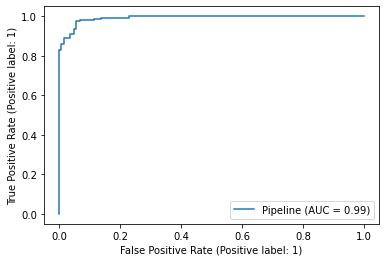

In [33]:
plot_roc_curve(mod_pipe, X_test, y_test)

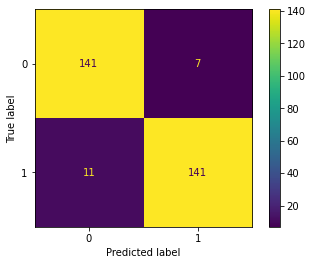

In [34]:
plot_confusion_matrix(mod_pipe, X_test, y_test)

- with proper text preprocessing steps
- Naive Bayes can perform really well on simple binary classification tasks.

#### Using TF-IDF

TFIDF does not necessarily perform better than CV:
- It is just a tool in our toolbelt often worth trying out.

In [35]:
from copy import deepcopy
tfidfmod_pipe = deepcopy(mod_pipe)
tfidfmod_pipe.steps[1] = ('tfidf', TfidfVectorizer(min_df=0.05, max_df=0.95)) # cuts words too rare/too frequent
tfidfmod_pipe.steps

[('token_norm', TextPreprocessor()),
 ('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [36]:
tfidfmod_pipe.fit(X_train, y_train)
ypred_tfidf = tfidfmod_pipe.predict(X_test)

In [37]:
roc_auc_score(y_test, ypred_tfidf)

0.9434566145092461

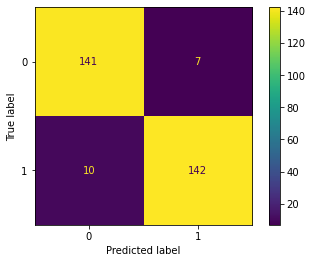

In [38]:
plot_confusion_matrix(tfidfmod_pipe, X_test, y_test)

#### With class imbalance

- Modification to Multinomial Naive Bayes: Complement Naive Bayes
- deals with data skew.

In [39]:
from sklearn.naive_bayes import ComplementNB

Pretty much same fitting/hyperparameters.

In [40]:
from copy import deepcopy
mod_comp_pipe = deepcopy(preprocess_pipeline)
mod_comp_pipe.steps.append(('compnb', ComplementNB()))
mod_comp_pipe.steps

[('token_norm', TextPreprocessor()),
 ('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('compnb', ComplementNB())]

In [41]:
mod_comp_pipe.fit(X_train, y_train)
y_pred_comp = mod_comp_pipe.predict(X_test)

In [42]:
print(classification_report(y_pred_comp, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       152
           1       0.93      0.95      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Comparable performance on this balanced dataset. Will perform *much* better on imbalanced dataset than MultinomialNB